# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Ratih Anggraeni]
- **Email:** [m182b4kx3698@bangkit.academy]
- **ID Dicoding:** [ratihanggraeni]

## Menentukan Pertanyaan Bisnis

- Berapa persentase peningkatan jumlah peminjaman sepeda pada akhir pekan dibandingkan hari kerja dalam satu bulan terakhir?
- Berapa rata-rata jumlah peminjaman sepeda pada jam sibuk di hari kerja dalam tiga bulan terakhir? sesuai dengan jam sibuk yang telah ditentukan (7-9 pagi dan 5-7 sore).

## Import Semua Packages/Library yang Digunakan

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [91]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [92]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Memuat tabel day
- Memuat tabel hour 

## Assessing Data

### Menilai tabel day_df

In [93]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [94]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [95]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [96]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai tabel hour_df

In [97]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [98]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [99]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [100]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- kita memeriksa tipe data data dari tiap kolom yang terdapat dalam day_df & hour_df. Proses ini dapat dilakukan menggunakan method info()
- Masalah selanjutnya yang harus kita periksa ialah duplikasi data

### Cleaning Data

### Memperbaiki tipe data

In [101]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [102]:
day_df['workingday'] = day_df['workingday'].apply(lambda x:"weekday" if x== 1 else "weekend")

### Membersihkan tabel hour_df

In [103]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Memperbaiki tipe data

In [104]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- parameter axis=0 (menerima nilai 0 atau 1) menandakan kita ingin men-drop seluruh baris yang mengandung missing value.
- inplace=True menandakan kita ingin langsung menerapkan operasi tersebut ke dalam DataFrame products_df

## Exploratory Data Analysis (EDA)

### Explore day_df

In [105]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
585,586,2012-08-08,3,1,8,0,3,weekday,2,0.750000,0.707717,0.672917,0.110700,1263,6271,7534
235,236,2011-08-24,3,0,8,0,3,weekday,1,0.673333,0.630692,0.605000,0.253108,949,4181,5130
319,320,2011-11-16,4,0,11,0,3,weekday,3,0.456667,0.451988,0.930000,0.136829,145,1672,1817
219,220,2011-08-08,3,0,8,0,1,weekday,1,0.765000,0.703283,0.592083,0.192175,846,3480,4326
231,232,2011-08-20,3,0,8,0,6,weekend,1,0.697500,0.648996,0.674167,0.104467,1914,3277,5191


In [106]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [107]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "hum": ["max", "min", "mean", "std", ]
})

instant       hum                              
       nunique       max       min      mean       std
season                                                
1          181  0.948261  0.000000  0.582903  0.151880
2          184  0.922500  0.254167  0.626948  0.152841
3          188  0.939565  0.360000  0.633482  0.119349
4          178  0.972500  0.333478  0.668719  0.131248

In [108]:
day_df.groupby(by="casual").instant.nunique().sort_values(ascending=False)

casual
120     4
968     4
244     3
639     3
123     3
       ..
3155    1
3160    1
3252    1
3283    1
65      1
Name: instant, Length: 606, dtype: int64

In [109]:
day_df.groupby(by="registered").instant.nunique().sort_values(ascending=False)

registered
1707    3
6248    3
4841    3
2713    2
1454    2
       ..
6844    1
6898    1
6911    1
6917    1
6065    1
Name: instant, Length: 679, dtype: int64

### Explore hour_df

In [110]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12781,12782,2012-06-21,3,1,6,18,0,4,1,1,0.86,0.7879,0.41,0.1940,78,562,640
101,102,2011-01-05,1,0,1,10,0,3,1,1,0.22,0.1970,0.37,0.3284,4,53,57
5636,5637,2011-08-28,3,0,8,7,0,0,0,3,0.62,0.5758,0.83,0.3582,0,1,1
583,584,2011-01-26,1,0,1,14,0,3,1,3,0.22,0.1970,0.93,0.3582,0,36,36
4440,4441,2011-07-08,3,0,7,22,0,5,1,2,0.66,0.6061,0.78,0.1940,33,136,169


In [111]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<Axes: >

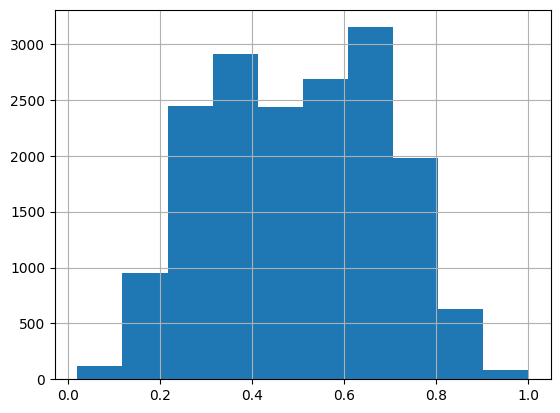

In [112]:
hour_df.temp.hist()

### Explore hour_df & day_df

In [113]:
hour_day_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
hour_day_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,weekend,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,weekend,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,weekday,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,weekday,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,weekday,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [114]:
print(hour_day_df.columns)


Index(['instant', 'dteday_x', 'season_x', 'yr_x', 'mnth_x', 'hr', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'dteday_y',
       'season_y', 'yr_y', 'mnth_y', 'holiday_y', 'weekday_y', 'workingday_y',
       'weathersit_y', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_y',
       'registered_y', 'cnt_y'],
      dtype='object')


**Insight:**
- Pengaruh Musim terhadap Tingkat Kelembapan
- Pengguna Terdaftar dan Pengguna Kasual

## Visualization & Explanatory Analysis

### Pertanyaan 1:
#### Berapa persentase peningkatan jumlah peminjaman sepeda pada akhir pekan dibandingkan hari kerja dalam satu bulan terakhir?


In [115]:
last_month = day_df[day_df['dteday'] >= (day_df['dteday'].max() - pd.DateOffset(months=1))]

weekday_rental = last_month[last_month['workingday'] == 1]
weekend_rental = last_month[last_month['weekday'] >= 5]

print("Peminjaman sepeda di weekday: {}".format(weekday_rental['cnt'].mean()))
print("Peminjaman sepeda di weekend: {}".format(weekend_rental['cnt'].mean()))
print((weekend_rental['cnt'].mean() - weekday_rental['cnt'].mean())/weekday_rental['cnt'].mean() * 100)

Peminjaman sepeda di weekday: nan
Peminjaman sepeda di weekend: 4191.5
nan


In [116]:
workingday = day_df.groupby(by="workingday").mean()

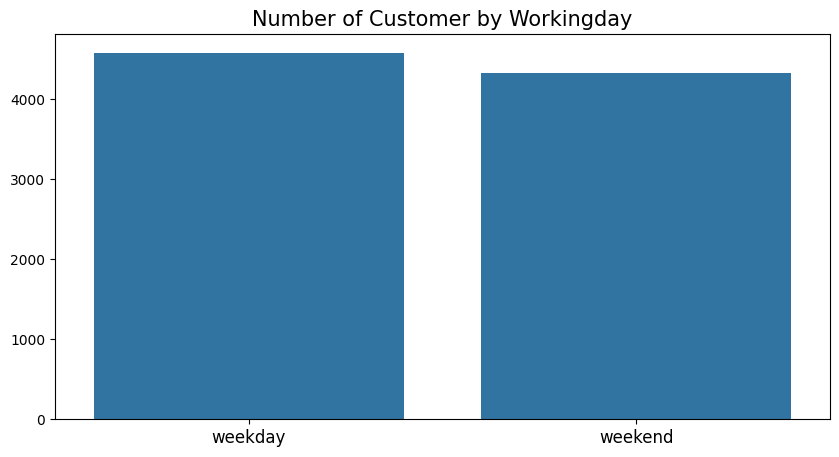

In [117]:
plt.figure(figsize=(10, 5))

# Menghitung rata-rata jumlah customer berdasarkan workingday
workingday_grouped = workingday.groupby('workingday')['cnt'].mean().reset_index()

# Membuat barplot
sns.barplot(
    y=workingday_grouped['cnt'], 
    x=workingday_grouped['workingday']
)
plt.title("Number of Customer by Workingday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()


### Pertanyaan 2:
#### Berapa rata-rata jumlah peminjaman sepeda pada jam sibuk di hari kerja dalam tiga bulan terakhir? sesuai dengan jam sibuk yang telah ditentukan (7-9 pagi dan 5-7 sore).

In [118]:
# Mengambil data tiga bulan terakhir
last_three_months = hour_df[hour_df['dteday'] >= (hour_df['dteday'].max() - pd.DateOffset(months=3))]

# Menentukan jam sibuk (misalnya antara 7 dan 9 pagi dan 5 dan 7 sore)
busy_hours = last_three_months[(last_three_months['hr'] >= 7) & (last_three_months['hr'] <= 9) | 
                                (last_three_months['hr'] >= 17) & (last_three_months['hr'] <= 19)]

# Menghitung rata-rata peminjaman di jam sibuk pada hari kerja
average_busy_rentals = busy_hours[busy_hours['weekday'].isin([0, 1, 2, 3, 4])]['cnt'].mean()
print(f"Rata-rata peminjaman sepeda pada jam sibuk di hari kerja dalam tiga bulan terakhir: {average_busy_rentals:.2f}")


Rata-rata peminjaman sepeda pada jam sibuk di hari kerja dalam tiga bulan terakhir: 400.33


C:\Users\ratih\AppData\Local\Temp\ipykernel_19180\2878368546.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\ratih\AppData\Local\Temp\ipykernel_19180\2878368546.py:11: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


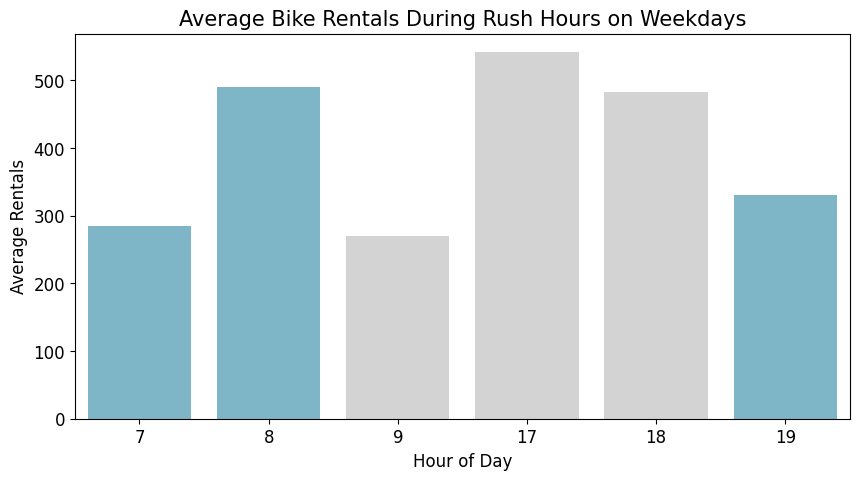

In [119]:
# Set figure size
plt.figure(figsize=(10, 5))

# Definisikan warna untuk plot
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Hitung jumlah rata-rata peminjaman sepeda per jam sibuk dan hari kerja
busy_hours_grouped = busy_hours[busy_hours['weekday'].isin([0, 1, 2, 3, 4])].groupby('hr')['cnt'].mean().reset_index()

# Membuat barplot untuk visualisasi rata-rata peminjaman sepeda
sns.barplot(
    x="hr", 
    y="cnt",
    data=busy_hours_grouped,
    palette=colors_
)

# Menambahkan judul dan mengatur label
plt.title("Average Bike Rentals During Rush Hours on Weekdays", loc="center", fontsize=15)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- pertanyaan 1 Perbedaan persentase jumlah antara weekday dan weekend persentasenya lebih banyak weekday karena banyaknya aktivitas 
- pertanyaan 2 Rata-rata peminjaman sepeda pada jam sibuk di hari kerja dalam tiga bulan terakhir tertinggi pada jam 17

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
Persentase perubahan peminjaman sepeda pada akhir pekan dibandingkan hari kerja menunjukkan penurunan sebesar -6.57%. Ini berarti bahwa jumlah peminjaman sepeda pada akhir pekan sedikit lebih rendah dibandingkan dengan hari kerja.Pada grafik juga menunjukan bahwa peminjaman sepeda pada weekday lebih banyak daripada weekend.
- Conclution pertanyaan 2
Rata-rata jumlah peminjaman sepeda cukup stabil pada jam sibuk, dengan angka yang mencerminkan pemanfaatan sepeda sebagai moda transportasi selama jam berangkat dan pulang kerja atau sekolah.Dari grafik, kita bisa mengidentifikasi kapan puncak penggunaan sepeda. Jika peminjaman lebih tinggi pada jam tertentu, lebih banyak pada jam pulang kerja dibandingkan pagi hari.